# Climate Change: Earth Surface Temperature Data

Some say climate change is the biggest threat of our age while others say it’s a myth based on dodgy science. We are turning some of the data over to you so you can form your own view.

Even more than with other data sets that Kaggle has featured, there’s a huge amount of data cleaning and preparation that goes into putting together a long-time study of climate trends. Early data was collected by technicians using mercury thermometers, where any variation in the visit time impacted measurements. In the 1940s, the construction of airports caused many weather stations to be moved. In the 1980s, there was a move to electronic thermometers that are said to have a cooling bias.

Given this complexity, there are a range of organizations that collate climate trends data. The three most cited land and ocean temperature data sets are NOAA’s MLOST, NASA’s GISTEMP and the UK’s HadCrut.

We have repackaged the data from a newer compilation put together by the Berkeley Earth, which is affiliated with Lawrence Berkeley National Laboratory. The Berkeley Earth Surface Temperature Study combines 1.6 billion temperature reports from 16 pre-existing archives. It is nicely packaged and allows for slicing into interesting subsets (for example by country). They publish the source data and the code for the transformations they applied. They also use methods that allow weather observations from shorter time series to be included, meaning fewer observations need to be thrown away.

In this dataset, we have include several files:

Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv):

Date: starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures
LandAverageTemperature: global average land temperature in celsius
LandAverageTemperatureUncertainty: the 95% confidence interval around the average
LandMaxTemperature: global average maximum land temperature in celsius
LandMaxTemperatureUncertainty: the 95% confidence interval around the maximum land temperature
LandMinTemperature: global average minimum land temperature in celsius
LandMinTemperatureUncertainty: the 95% confidence interval around the minimum land temperature
LandAndOceanAverageTemperature: global average land and ocean temperature in celsius
LandAndOceanAverageTemperatureUncertainty: the 95% confidence interval around the global average land and ocean temperature
Other files include:

Global Average Land Temperature by Country (GlobalLandTemperaturesByCountry.csv)
Global Average Land Temperature by State (GlobalLandTemperaturesByState.csv)
Global Land Temperatures By Major City (GlobalLandTemperaturesByMajorCity.csv)
Global Land Temperatures By City (GlobalLandTemperaturesByCity.csv)
The raw data comes from the Berkeley Earth data page.

# Description

The previous text is the description given with the files. The focal point is the change in average temperature of the earth due to climate change.

Five `.csv` files are provided:
+ GlobalLandTemperaturesByCity.csv
+ GlobalLandTemperaturesByCountry.csv
+ GlobalLandTemperaturesByMajorCity.csv
+ GlobalLandTemperaturesByState.csv
+ GlobalTemperatures.csv

The are extense, and in there are some missing information. To reduce project time and obtain an initial analysis only the files `GlobalLandTemperaturesByCountry.csv` and `GlobalTemperatures.csv` will be analysed.

The objective of this project is to see how the average temperature as increased over the years globaly and in each country. Some charts will be created to better observe this changes.

## Import modules

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

## Load and inspect the data

In [2]:
#global temperatures file
globaltemp = pd.read_csv("GlobalTemperatures.csv")
print(globaltemp.head())
print(globaltemp.columns)

#country temperature file
countrytemp = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
print(countrytemp.head())
print(countrytemp.columns)

           dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                 

## Data cleaning

Before starting to analyze some data cleaning is necessary.

For the global temperatures file the missing data is between the 1750 to the 1850, which means that in that interval of time only the average temperature can be analyzed.

The rest of the missing data will be dropped.

For the contries temperature file there is a lot of missing data. To tackle this problem there are, in my point of view to paths, filling the missing values with the previous row values, or just dropping those rows. The last option is the one to be followed because for each country it will be only used the max and min average temperature and the respective years.

In [3]:
#global data cleanning
globaltemp_avg = globaltemp[["dt", "LandAverageTemperature", "LandAverageTemperatureUncertainty"]].dropna().reset_index()
globaltemp_min_max = globaltemp[["dt", "LandMaxTemperature", "LandMaxTemperatureUncertainty", "LandMinTemperature",
                                 "LandMinTemperatureUncertainty"]].dropna().reset_index()
globaltemp_ocean_land = globaltemp[["dt", "LandAndOceanAverageTemperature",
                                    "LandAndOceanAverageTemperatureUncertainty"]].dropna().reset_index()
print(globaltemp_avg.head(-5))
print(globaltemp_min_max.head())
print(globaltemp_ocean_land.head())

#countries data cleanning
countrytemp = countrytemp.dropna().reset_index()
print(countrytemp.head())

      index          dt  LandAverageTemperature  \
0         0  1750-01-01                   3.034   
1         1  1750-02-01                   3.083   
2         2  1750-03-01                   5.626   
3         3  1750-04-01                   8.490   
4         4  1750-05-01                  11.573   
...     ...         ...                     ...   
3170   3182  2015-03-01                   6.740   
3171   3183  2015-04-01                   9.313   
3172   3184  2015-05-01                  12.312   
3173   3185  2015-06-01                  14.505   
3174   3186  2015-07-01                  15.051   

      LandAverageTemperatureUncertainty  
0                                 3.574  
1                                 3.702  
2                                 3.076  
3                                 2.451  
4                                 2.072  
...                                 ...  
3170                              0.060  
3171                              0.088  
3172     

## Global temperatures

Firstly the global temperatures will be analyzed.

This analysis will be divided into to two parts, the evolution of the average temperature over the years, and then the evolution of the min and max temperatures, starting in 1850.

A last graph will be created for the land and ocean temperatures.

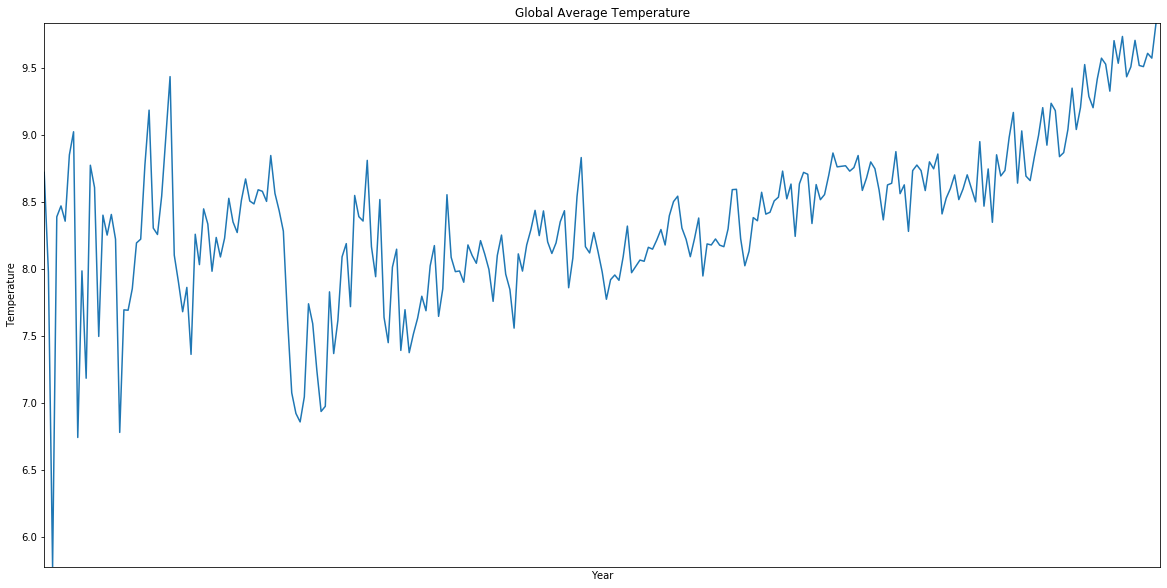

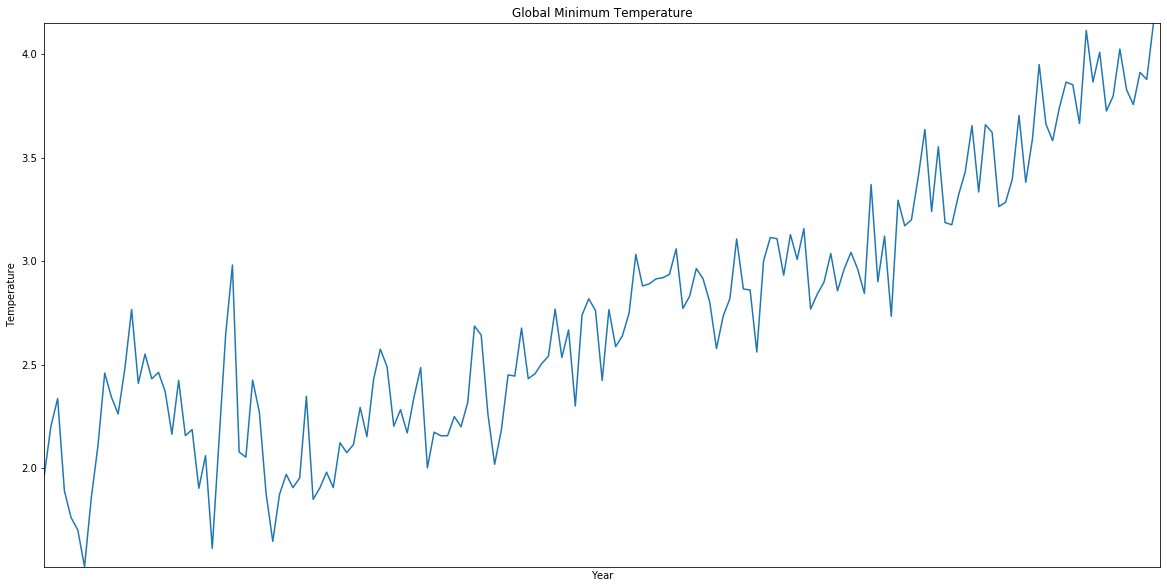

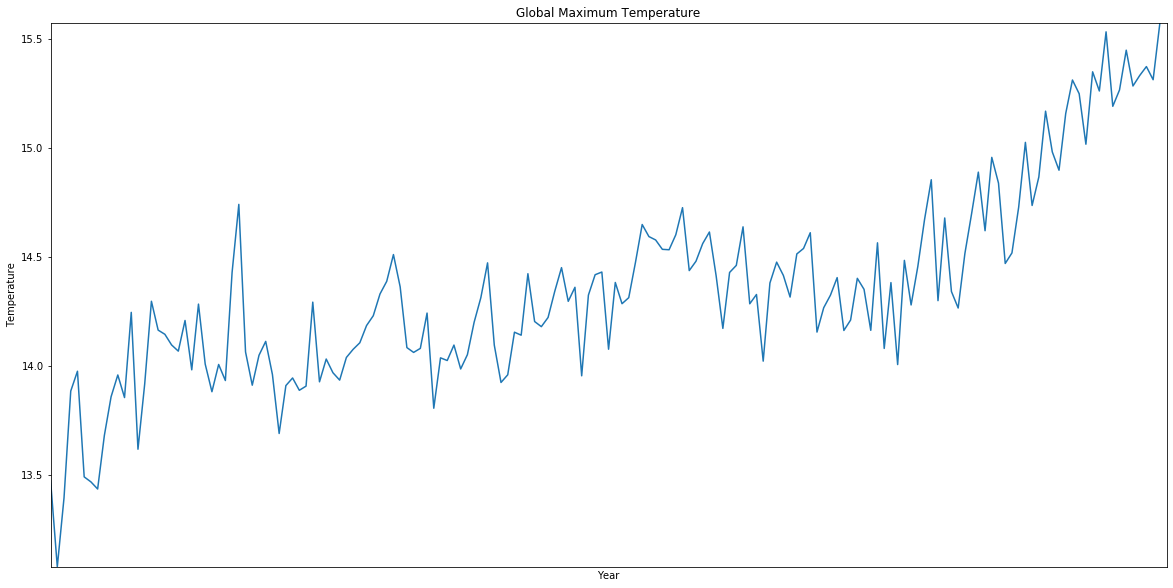

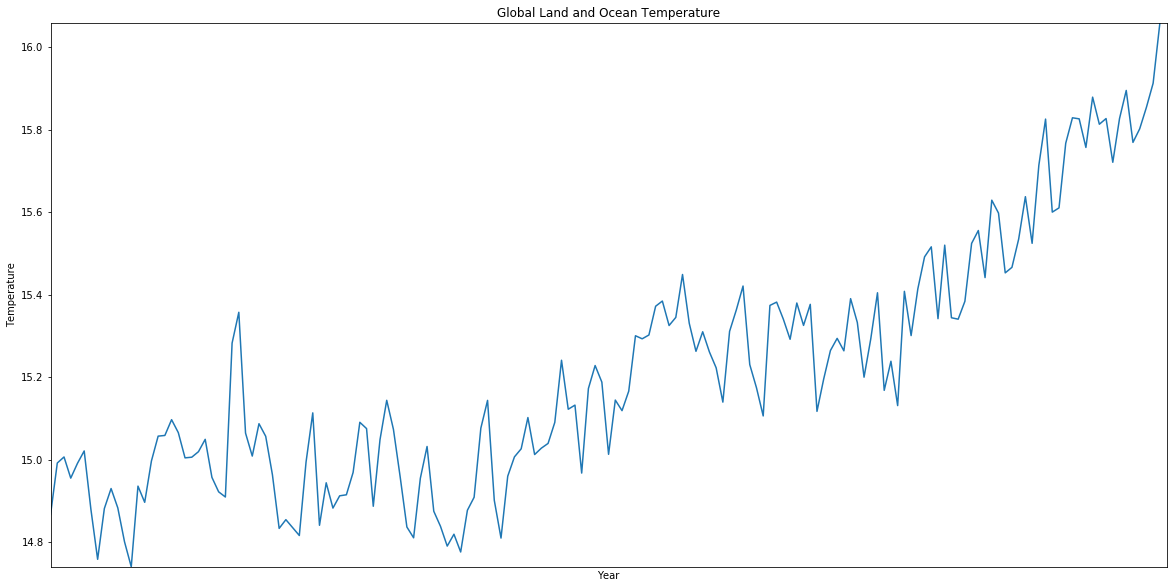

In [18]:
def get_graph(data, temp, graph_title):
    years = []
    for j in range(len(data[temp])):
        if data["dt"][j][0:4] not in years:
            years.append(data["dt"][j][0:4])

    year_temp = []
    for year in years:
        year_avg = []
        for k in range(len((data[temp]))):
            if data["dt"][k][0:4] == year:
                year_avg.append(data[temp][k])
        year_temp.append(np.mean(year_avg))

    plt.figure(figsize=(20, 10))
    plt.plot(years, year_temp)
    plt.title(graph_title)
    plt.xlabel("Year")
    plt.ylabel("Temperature")
    plt.axis([0, len(years), min(year_temp), max(year_temp)])
    plt.xticks([], [])
    
#average temperature
get_graph(globaltemp_avg, "LandAverageTemperature", "Global Average Temperature")

#minimum temperature
get_graph(globaltemp_min_max, "LandMinTemperature", "Global Minimum Temperature")

#maximum temperature
get_graph(globaltemp_min_max, "LandMaxTemperature", "Global Maximum Temperature")

#land and ocean temperature
get_graph(globaltemp_ocean_land, "LandAndOceanAverageTemperature", "Global Land and Ocean Temperature")

It's clear to see that the temperature of the earth has been increasing over the years, not just only the average, but the minimum and maximum temperatures too.